[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


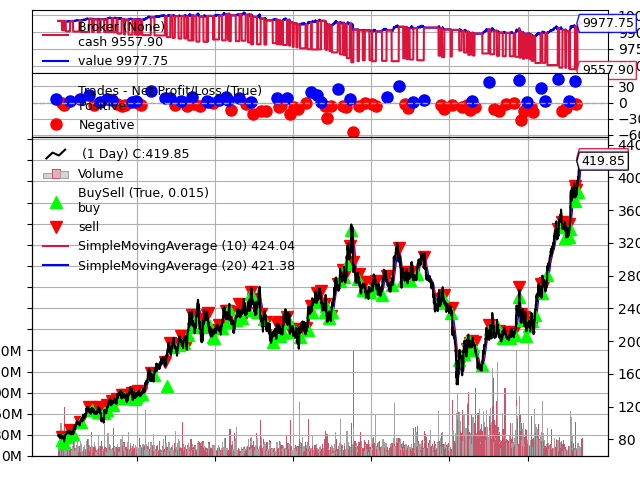

In [3]:
import backtrader as bt
import yfinance as yf

class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast_period', 10),  # Fast moving average period
        ('slow_period', 20)   # Slow moving average period
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.fast_period
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.slow_period
        )

    def next(self):
        if self.fast_ma[0] > self.slow_ma[0] and self.fast_ma[-1] <= self.slow_ma[-1]:
            self.buy()
        elif self.fast_ma[0] < self.slow_ma[0] and self.fast_ma[-1] >= self.slow_ma[-1]:
            self.sell()

# Example usage
if __name__ == "__main__":
    ticker = "ITC.NS"  # Ticker symbol of the desired stock

    # Fetch historical data from Yahoo Finance API
    data = yf.download(ticker, start="2010-01-01", end="2023-05-21")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))

    # Add the strategy to cerebro
    cerebro.addstrategy(MovingAverageCrossStrategy)

    # Run the backtest
    cerebro.run()

    # Visualize the results
    cerebro.plot()


[*********************100%***********************]  1 of 1 completed
Total trades: 86, Winning trades: 30, Win rate: 34.88%


<IPython.core.display.Javascript object>


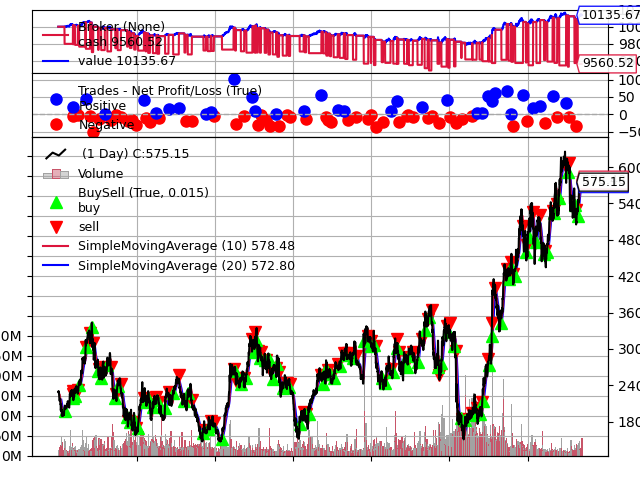

In [4]:
import backtrader as bt
import yfinance as yf

class MovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast_period', 10),  # Fast moving average period
        ('slow_period', 20)   # Slow moving average period
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.fast_period
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.slow_period
        )
        
        self.total_trades = 0  # Variable to track the total number of trades
        self.win_trades = 0    # Variable to track the number of winning trades

    def next(self):
        if self.fast_ma[0] > self.slow_ma[0] and self.fast_ma[-1] <= self.slow_ma[-1]:
            self.buy()
            
        elif self.fast_ma[0] < self.slow_ma[0] and self.fast_ma[-1] >= self.slow_ma[-1]:
            self.sell()
            self.total_trades += 1  # Increment total trades count

            if self.position.size > 0:  # Check for positive position size
                trade_pnl = self.position.size * (self.data.close[0] - self.data.close[-1])
                if trade_pnl > 0 and self.position.size > 0:  # Check if trade is profitable and in the correct direction
                    self.win_trades += 1


    def stop(self):
        win_rate = (self.win_trades / self.total_trades) * 100
        print(f"Total trades: {self.total_trades}, Winning trades: {self.win_trades}, Win rate: {win_rate:.2f}%")

# Example usage
if __name__ == "__main__":
    ticker = "SBIN.NS"  # Ticker symbol of the desired stock

    # Fetch historical data from Yahoo Finance API
    data = yf.download(ticker, start="2010-01-01", end="2023-05-21")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))

    # Add the strategy to cerebro
    cerebro.addstrategy(MovingAverageCrossStrategy)

    # Run the backtest
    cerebro.run()

    # Visualize the results
    cerebro.plot()
    

    




[*********************100%***********************]  1 of 1 completed
Total trades: 126, Winning trades: 57, Win rate: 45.24%


<IPython.core.display.Javascript object>


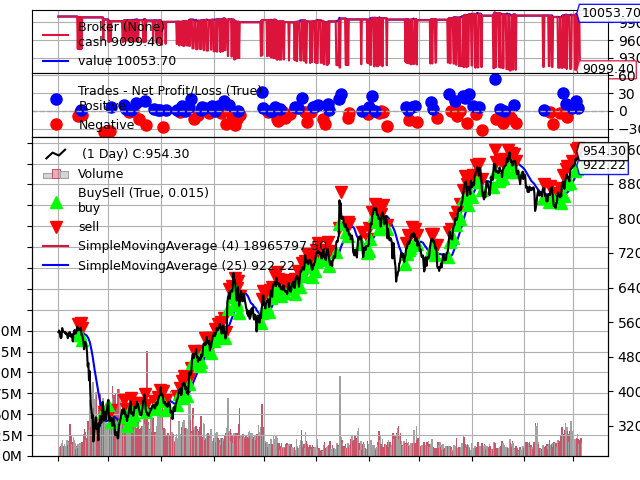

In [38]:
class VolumePriceStrategy(bt.Strategy):
    params = (
        ('period', 4),  # Number of previous sessions to consider
    )

    def __init__(self):
        self.volume_avg = bt.indicators.SimpleMovingAverage(
            self.data.volume, period=self.params.period)
        self.close_avg = bt.indicators.SimpleMovingAverage(
            self.data.close, period=25)
        self.total_trades = 0  # Variable to track the total number of trades
        self.win_trades = 0    # Variable to track the number of winning trades
        


    def next(self):
        if self.data.volume[0] > self.volume_avg[0] and self.data.close[0] > self.close_avg[0]:
            if not self.position:
                self.buy()
        elif self.position:
            if self.data.close[0] < self.close_avg[0]:
                self.sell()
                self.total_trades += 1
                if self.position.size > 0 and self.data.close[0] > self.data.close[-1]:
                    self.win_trades += 1
            elif self.data.volume[0] < self.volume_avg[0] :
                self.sell()
                self.total_trades += 1
                if self.position.size > 0 and self.data.close[0] > self.data.close[-1]:
                    self.win_trades += 1



    def stop(self):
        win_rate = (self.win_trades / self.total_trades) * 100
        print(f"Total trades: {self.total_trades}, Winning trades: {self.win_trades}, Win rate: {win_rate:.2f}%")


# Example usage
if __name__ == "__main__":
    ticker = "ICICIBANK.NS"  # Ticker symbol of the desired stock

    # Fetch historical data from Yahoo Finance API
    data = yf.download(ticker, start="2020-01-01", end="2023-05-21")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))

    # Add the strategy to cerebro
    cerebro.addstrategy(VolumePriceStrategy)

    # Run the backtest
    cerebro.run()

    # Visualize the results
    cerebro.plot()

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


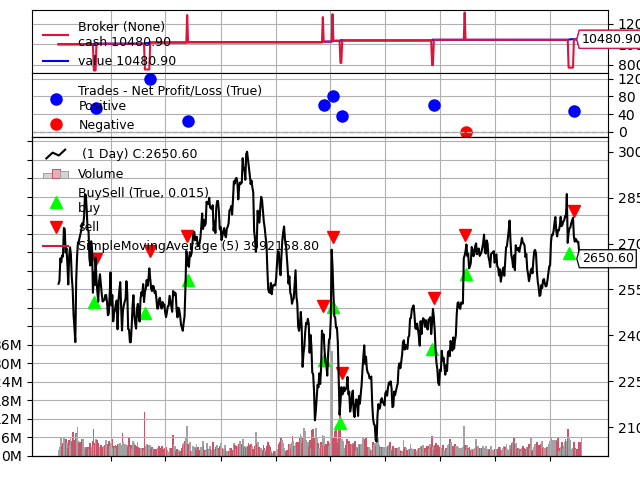

In [40]:
import backtrader as bt
import yfinance as yf

class VolumeReversalStrategy(bt.Strategy):
    params = (
        ('period', 5),  # Number of previous sessions to consider for volume average
        ('volume_threshold', 1.7),  # Volume threshold for filtering
        ('reversal_percent', 0.02),  # Minimum percentage change for reversal
        ('stop_loss_percent', 0.01),  # Stop loss percentage
        ('take_profit_percent', 0.03),  # Take profit percentage
    )

    def __init__(self):
        self.volume_filter = None
        self.entry_price = None
        self.stop_loss_price = None
        self.take_profit_price = None

    def start(self):
        self.volume_filter = bt.indicators.SimpleMovingAverage(self.data.volume, period=self.params.period) * self.params.volume_threshold

    def next(self):
        if self.position:
            if self.data.close[0] <= self.stop_loss_price:
                self.close()
            elif self.data.close[0] >= self.take_profit_price:
                self.close()
        else:
            if self.data.volume[0] > self.volume_filter[0]:
                if self.data.close[0] < self.data.close[-1] * (1 - self.params.reversal_percent):
                    self.buy()
                    self.entry_price = self.data.close[0]
                    self.stop_loss_price = self.entry_price * (1 - self.params.stop_loss_percent)
                    self.take_profit_price = self.entry_price * (1 + self.params.take_profit_percent)
                elif self.data.close[0] > self.data.close[-1] * (1 + self.params.reversal_percent):
                    self.sell()
                    self.entry_price = self.data.close[0]
                    self.stop_loss_price = self.entry_price * (1 + self.params.stop_loss_percent)
                    self.take_profit_price = self.entry_price * (1 - self.params.take_profit_percent)


# Example usage
if __name__ == "__main__":
    ticker = "HDFC.NS"  # Ticker symbol of the desired stock

    # Fetch historical data from Yahoo Finance API
    data = yf.download(ticker, start="2021-01-01", end="2023-05-29")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))

    # Add the strategy to cerebro
    cerebro.addstrategy(VolumeReversalStrategy)

    # Run the backtest
    cerebro.run()

    # Visualize the results
    cerebro.plot()

In [3]:
import backtrader as bt
from datetime import datetime
import yfinance as yf


class TradeAnalyzer(bt.Analyzer):
    def __init__(self):
        self.trades = []

    def next(self):
        if self.strategy.position:  # If there is an open position, skip
            return

        # Rest of the trading logic
        if self.strategy.data.volume[0] > self.strategy.volume_avg[0] and self.strategy.data.close[0] > self.strategy.close_avg[0]:
            self.strategy.buy()
        elif self.strategy.data.volume[0] < self.strategy.volume_avg[0] and self.strategy.data.close[0] < self.strategy.close_avg[0]:
            self.strategy.sell()

        if self.strategy.position:  # If a trade was made, record the trade
            self.trades.append({
                'datetime': self.strategy.datetime.datetime(),
                'price': self.strategy.data.close[0],
                'action': 'buy' if self.strategy.position.size > 0 else 'sell'
            })

    def get_analysis(self):
        return self.trades

class VolumeReversalStrategy(bt.Strategy):
    params = (
        ('period', 5),  # Number of previous sessions to consider
    )

    def __init__(self):
        self.volume_avg = bt.indicators.SimpleMovingAverage(
            self.data.volume, period=self.params.period)
        self.close_avg = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.period)

    def next(self):
        pass  # Trading logic is handled in the TradeAnalyzer

if __name__ == "__main__":
    ticker = "SBIN.NS"  # Ticker symbol of the desired stock

    # Fetch historical data from Yahoo Finance API
    data = yf.download(ticker, start="2021-01-01", end="2023-05-29")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(data)

    # Add the strategy to cerebro
    cerebro.addstrategy(VolumeReversalStrategy)

    # Add the custom analyzer
    cerebro.addanalyzer(TradeAnalyzer)

    # Run the backtest
    strategies = cerebro.run()

    # Get the trades from the analyzer
    analyzer = strategies[0].analyzers.getbyname('tradeanalyzer')
    trades = analyzer.get_analysis()

    # Print all the trades
    for trade in trades:
        print(trade)


[*********************100%***********************]  1 of 1 completed


AttributeError: 'DataFrame' object has no attribute 'setenvironment'

In [9]:
import backtrader as bt
import pandas as pd
from datetime import datetime

class TradeAnalyzer(bt.Analyzer):
    def __init__(self):
        self.trades = []

    def next(self):
        if self.strategy.position:  # If there is an open position, skip
            return

        # Rest of the trading logic
        if self.strategy.data.volume[0] > self.strategy.volume_avg[0] and self.strategy.data.close[0] > self.strategy.close_avg[0]:
            self.strategy.buy()
        elif self.strategy.data.volume[0] < self.strategy.volume_avg[0] and self.strategy.data.close[0] < self.strategy.close_avg[0]:
            self.strategy.sell()

        if self.strategy.position:  # If a trade was made, record the trade
            self.trades.append({
                'datetime': self.strategy.datetime.datetime(),
                'price': self.strategy.data.close[0],
                'action': 'buy' if self.strategy.position.size > 0 else 'sell'
            })

    def get_analysis(self):
        return self.trades

class VolumeReversalStrategy(bt.Strategy):
    params = (
        ('period', 5),  # Number of previous sessions to consider
    )

    def __init__(self):
        self.volume_avg = bt.indicators.SimpleMovingAverage(
            self.data.volume, period=self.params.period)
        self.close_avg = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.period)

    def next(self):
        pass  # Trading logic is handled in the TradeAnalyzer

if __name__ == "__main__":
    ticker = "SBIN.NS"  # Ticker symbol of the desired stock

    data = yf.download(ticker, start="2020-01-01", end="2023-05-21")

    # Create a cerebro instance
    cerebro = bt.Cerebro()

    # Add the data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))


    # Add the strategy to cerebro
    cerebro.addstrategy(VolumeReversalStrategy)

    # Add the custom analyzer
    cerebro.addanalyzer(TradeAnalyzer)

    # Run the backtest
    strategies = cerebro.run()

    # Get the trades from the analyzer
    analyzer = strategies[0].analyzers.getbyname('tradeanalyzer')
    trades = analyzer.get_analysis()

    # Print all the trades
    for trade in trades:
        print(trade)


[*********************100%***********************]  1 of 1 completed
